In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   serial_no.         400 non-null    int64  
 1   gre_score          400 non-null    int64  
 2   toefl_score        400 non-null    int64  
 3   university_rating  400 non-null    int64  
 4   sop                400 non-null    float64
 5   lor                400 non-null    float64
 6   cgpa               400 non-null    float64
 7   research           400 non-null    int64  
 8   chance_of_admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.describe()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.isna().sum()

serial_no.           0
gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      0
dtype: int64

In [8]:
df.drop(columns=['serial_no.'],axis=1,inplace=True)

In [9]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.corr()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
gre_score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
toefl_score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
university_rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
sop,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
lor,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
cgpa,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
chance_of_admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

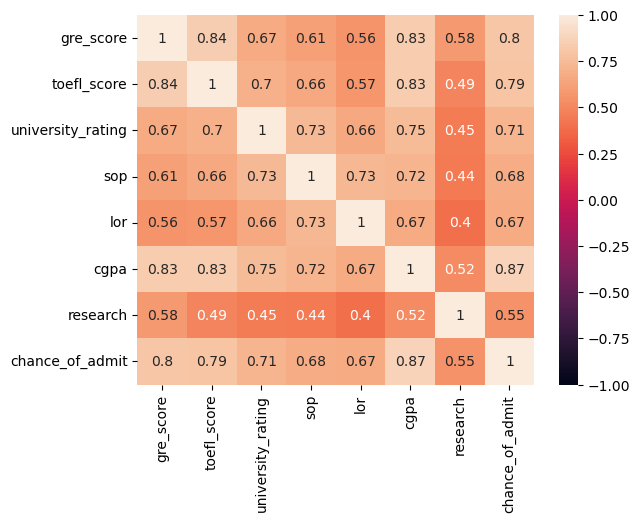

In [11]:
sns.heatmap(df.corr(),vmax=1,vmin=-1,annot=True)

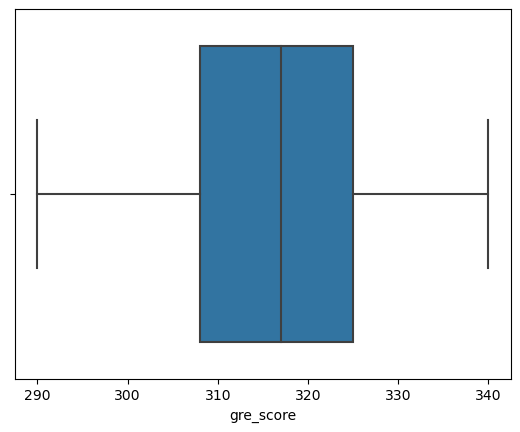

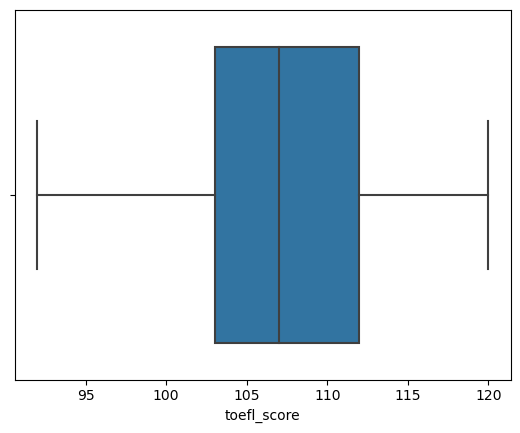

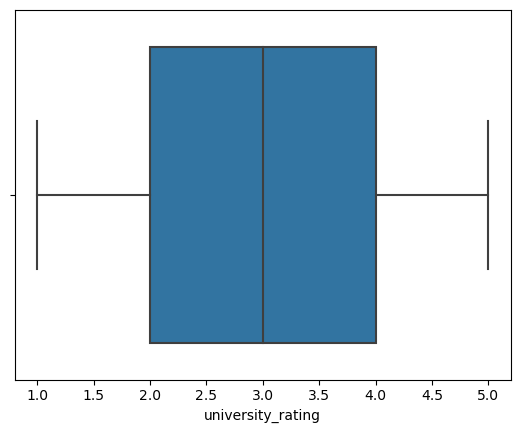

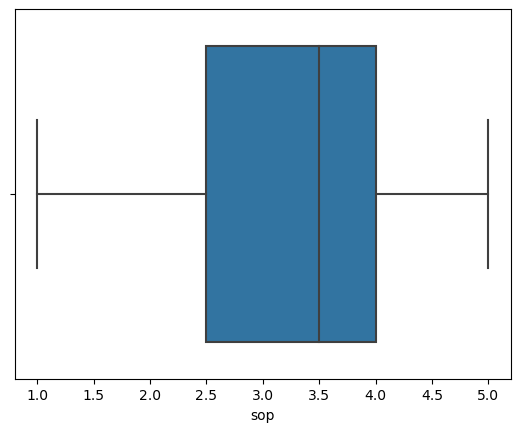

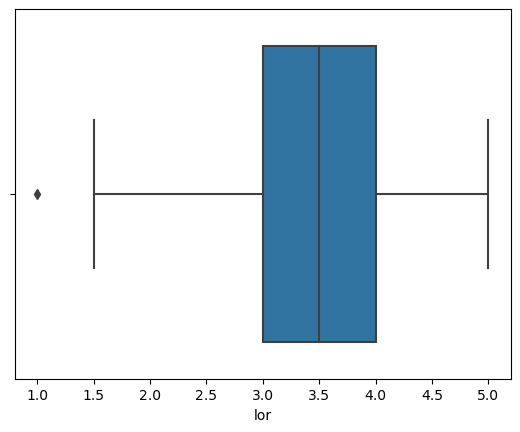

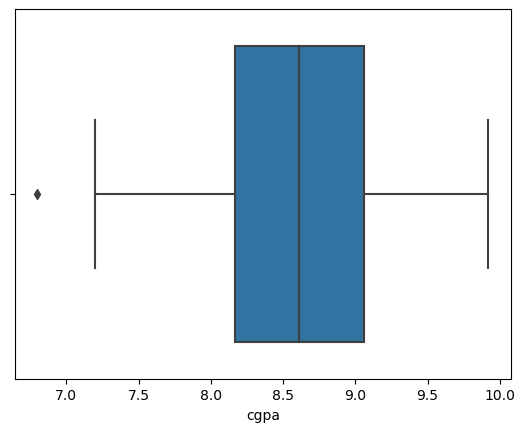

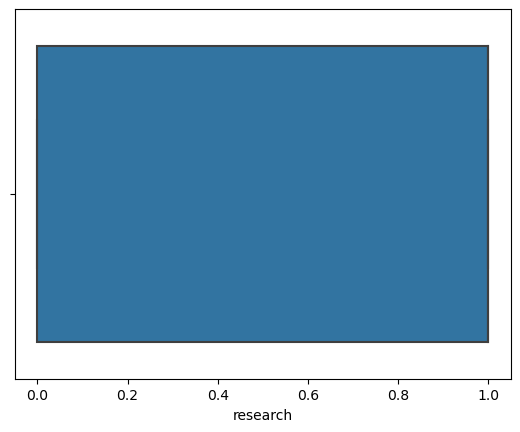

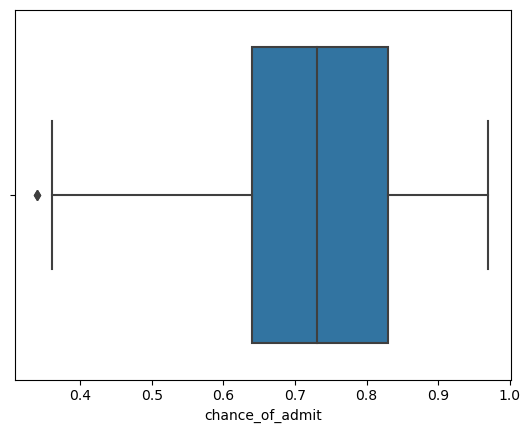

In [12]:
for i in df.columns:
    sns.boxplot(x=i,data=df)
    plt.show()

# Splitting the data

In [13]:
#df=df['chance_of_admit'].astype('int64')

In [14]:
trns=df['chance_of_admit']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre_score          400 non-null    int64  
 1   toefl_score        400 non-null    int64  
 2   university_rating  400 non-null    int64  
 3   sop                400 non-null    float64
 4   lor                400 non-null    float64
 5   cgpa               400 non-null    float64
 6   research           400 non-null    int64  
 7   chance_of_admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [16]:
from sklearn import preprocessing
from sklearn import utils

In [17]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(trns)

In [18]:
print(y_transformed)

[54 38 34 42 27 52 37 30 12  7 14 46 40 24 23 16 28 27 25 24 26 32 56 57
 59 56 38  6  8 16 27 36 53 52 56 50 26 20 14 10  8 11 15 49 53 50 48 51
 44 40 38 18 40 34 32 26 26  8  1  4 10  9 16 18 14 17 23 19 30 40 56 58
 55 46 36 34 36 26  6  8 12 58 54 54 56 38 34 28 26 36 26  2  0  6  1  4
 10 48 52 41 33 26 24 19 36 31 49 53 55 30 23 31 24 34 21 28 18  7  9 33
 56 56 19 23 19 26 47 40 46 54 58 39 33 41 51 44 38 33 42 40 46 52 54 59
 42 43 37 45 58 41 55 56 48 41 42 39 32 27 23 14 19 15 29 30 43 40 27 26
 26 27 30 51 48 51 49 47 52 44 34 35 33 33 30 37 34 51 46 55 55 50 52 49
 48 56 39 40 35 35 32 34 35 34 59 59 31 19 25 28 26 30 41 44 57 58 56 55
 53 47 46 36 38 37 38 33 29 23 25 26 33 44 35 36 31 26 53 50 47 48 32 21
 22 27 32 38 25 43 34 33 42 39 36 32 33 55 47 41 38 40 39 52 49 33 32 32
 37 33 34 35 45 39 34 16 11 14 20 40 51 32 28 29 30 42 43 42 56 55 54 51
 44 41 20 18 18 26 23 30 38 48 52 33 24 28 27 35 24 36 41 42 31 32 38 46
 40 29 28 27 16 20 41 42 37 35 34 24 29 43 25 31 42

In [19]:
df['y_transformed']= lab.fit_transform(trns)

In [20]:
df

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,y_transformed
0,337,118,4,4.5,4.5,9.65,1,0.92,54
1,324,107,4,4.0,4.5,8.87,1,0.76,38
2,316,104,3,3.0,3.5,8.00,1,0.72,34
3,322,110,3,3.5,2.5,8.67,1,0.80,42
4,314,103,2,2.0,3.0,8.21,0,0.65,27
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,44
396,325,107,3,3.0,3.5,9.11,1,0.84,46
397,330,116,4,5.0,4.5,9.45,1,0.91,53
398,312,103,3,3.5,4.0,8.78,0,0.67,29


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre_score          400 non-null    int64  
 1   toefl_score        400 non-null    int64  
 2   university_rating  400 non-null    int64  
 3   sop                400 non-null    float64
 4   lor                400 non-null    float64
 5   cgpa               400 non-null    float64
 6   research           400 non-null    int64  
 7   chance_of_admit    400 non-null    float64
 8   y_transformed      400 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [22]:
df.drop(columns=['chance_of_admit'],inplace=True)

In [23]:
x = df.iloc[:,:-1]
y = df['y_transformed']

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
xtrain

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [26]:
ytrain

93      6
23     57
299    33
13     24
90     26
       ..
255    41
72     55
396    46
235    50
37     20
Name: y_transformed, Length: 320, dtype: int64

## Model Building

In [27]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [28]:
ypred = lg.predict(xtest)

In [29]:
ypred

array([30, 33, 41, 38, 41, 34, 34, 34, 26, 38, 41, 52, 51, 26, 38, 42, 41,
       55, 26, 42, 32, 52, 41, 56, 26, 26, 38, 42, 41, 30, 56, 26, 51, 41,
       41, 33, 26, 26, 56, 34, 51, 52, 56, 42, 56, 38, 35, 41, 34, 26, 41,
       26, 41, 34, 34, 56, 26, 48, 38, 41, 41, 34, 51, 33, 26, 51, 41, 33,
       34, 51, 41, 33, 33, 34, 41, 19, 26, 34, 41, 34], dtype=int64)

In [30]:
len(xtest)

80

In [31]:
len(ypred)

80

## Model Evaluation

In [32]:
print("Actual Y:",ytest[:20].values)
print("predict Y:",ypred[:20])

Actual Y: [29 26 42 43 48 20 35 18 16 56 49 57 55 29 35 26 51 52  6 33]
predict Y: [30 33 41 38 41 34 34 34 26 38 41 52 51 26 38 42 41 55 26 42]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
confusion_matrix(ytest,ypred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0]], dtype=int64)

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00    

Text(50.722222222222214, 0.5, 'predicted values')

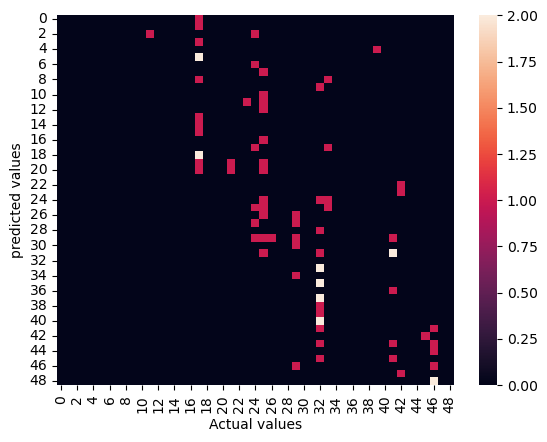

In [36]:
sns.heatmap(confusion_matrix(ytest,ypred))
plt.xlabel("Actual values")
plt.ylabel("predicted values")

##  Using Decision tree

In [42]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,y_transformed
0,337,118,4,4.5,4.5,9.65,1,54
1,324,107,4,4.0,4.5,8.87,1,38
2,316,104,3,3.0,3.5,8.00,1,34
3,322,110,3,3.5,2.5,8.67,1,42
4,314,103,2,2.0,3.0,8.21,0,27


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [45]:
x

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [46]:
y

0      54
1      38
2      34
3      42
4      27
       ..
395    44
396    46
397    53
398    29
399    57
Name: y_transformed, Length: 400, dtype: int64

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [48]:
dtree = DecisionTreeClassifier(max_depth=2,criterion='gini')

In [49]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

In [51]:
ypred= dtree.predict(xtest)
ypred

array([41, 26, 41, 26, 41, 26, 26, 26, 26, 56, 41, 56, 56, 26, 26, 26, 41,
       56, 26, 26, 26, 41, 41, 56, 26, 26, 26, 26, 56, 26, 56, 26, 41, 41,
       26, 26, 26, 26, 56, 41, 41, 26, 41, 26, 58, 26, 26, 41, 26, 26, 41,
       26, 41, 41, 26, 41, 26, 26, 41, 26, 56, 26, 56, 41, 26, 41, 41, 41,
       26, 41, 41, 26, 26, 26, 41, 26, 26, 26, 26, 26], dtype=int64)

In [52]:
print(dtree.score(xtest,ytest))

0.0625


In [55]:
print(accuracy_score(ytest,ypred))

0.0625


# Visualisation

IndexError: list index out of range

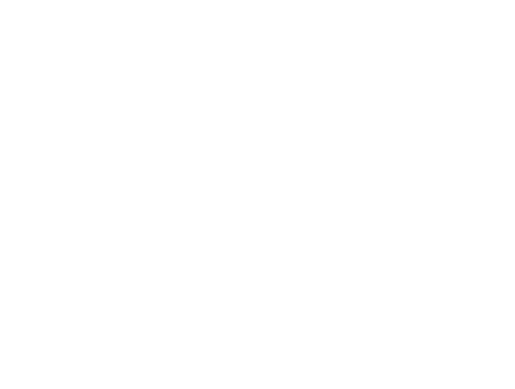

In [59]:
tree.plot_tree(dtree,
               feature_names = xtrain.columns,
               max_depth=3,
               class_names=['admit','not admit'],
               label='root',
               filled = True
              )